<a href="https://colab.research.google.com/github/bathicodes/EXPERIMENTS/blob/main/Dogs_vs_Cats_tiny_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check GPU Status

In [1]:
!nvidia-smi

Fri Sep  9 13:45:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Import dataset from Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Machine Learning/ML Reboot/CNN with dataset/dataset/training_set'
test_path = '/content/drive/MyDrive/Machine Learning/ML Reboot/CNN with dataset/dataset/test_set'

Mounted at /content/drive


# Import libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Creating augmented data generators

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1/255
)

# Pre-processing data

In [5]:
training_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32
)

Found 8001 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Model 1 (baseline model)

## Creating baseline model

In [6]:
# create the model 
model_1 = tf.keras.models.Sequential()

model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_1.add(tf.keras.layers.Flatten())

model_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [7]:
# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [8]:
# fit the model
history_1 = model_1.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 1701s 7s/step - loss: 0.6861 - accuracy: 0.5269 - val_loss: 0.6690 - val_accuracy: 0.5365
Epoch 2/5
251/251 [==============================] - 46s 183ms/step - loss: 0.6475 - accuracy: 0.6142 - val_loss: 0.6474 - val_accuracy: 0.6250
Epoch 3/5
251/251 [==============================] - 44s 177ms/step - loss: 0.6296 - accuracy: 0.6480 - val_loss: 0.6791 - val_accuracy: 0.5760
Epoch 4/5
251/251 [==============================] - 44s 175ms/step - loss: 0.6278 - accuracy: 0.6449 - val_loss: 0.6288 - val_accuracy: 0.6545
Epoch 5/5
251/251 [==============================] - 46s 182ms/step - loss: 0.6169 - accuracy: 0.6609 - val_loss: 0.6135 - val_accuracy: 0.6700


## Plot loss curves

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# plot the validation and training curves seperately

def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

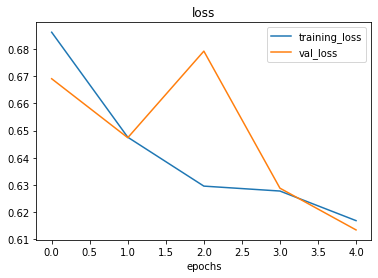

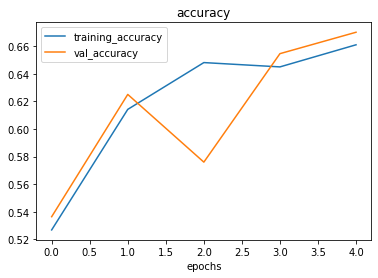

In [10]:
plot_loss_curves(history_1)

## Evaluate baseline model

In [11]:
model_1.evaluate(test_data)

63/63 [==============================] - 7s 115ms/step - loss: 0.6135 - accuracy: 0.6700


[0.6135032176971436, 0.6700000166893005]

# Model 2 - improving the baseline model

Adding more layers (Dense layer with 128 neurons)

## Creating the model 2

In [12]:
# create the model 2
model_2 = tf.keras.models.Sequential()

model_2.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_2.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_2.add(tf.keras.layers.Flatten())

model_2.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [13]:
# compile the model 2
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [14]:
# fit the model 2
history_2 = model_2.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 45s 179ms/step - loss: 0.6595 - accuracy: 0.5904 - val_loss: 0.6877 - val_accuracy: 0.5725
Epoch 2/5
251/251 [==============================] - 44s 176ms/step - loss: 0.6366 - accuracy: 0.6352 - val_loss: 0.6917 - val_accuracy: 0.5525
Epoch 3/5
251/251 [==============================] - 45s 179ms/step - loss: 0.6188 - accuracy: 0.6534 - val_loss: 0.5869 - val_accuracy: 0.6870
Epoch 4/5
251/251 [==============================] - 44s 175ms/step - loss: 0.6245 - accuracy: 0.6444 - val_loss: 0.6759 - val_accuracy: 0.5950
Epoch 5/5
251/251 [==============================] - 44s 174ms/step - loss: 0.5914 - accuracy: 0.6830 - val_loss: 0.5872 - val_accuracy: 0.6970


## Plot loss curves

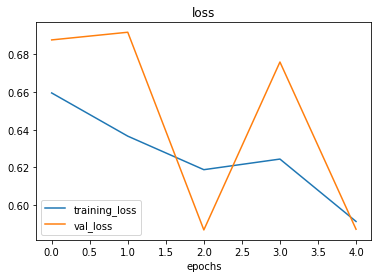

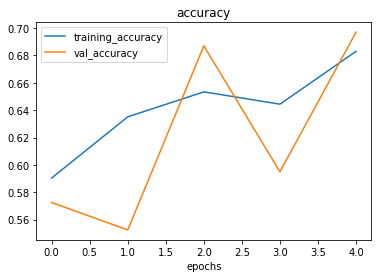

In [15]:
plot_loss_curves(history_2)

## Evaluate the model 2

In [16]:
model_2.evaluate(test_data)

63/63 [==============================] - 7s 117ms/step - loss: 0.5872 - accuracy: 0.6970


[0.5872393846511841, 0.6970000267028809]

# Model 3 - Improvement for the model 2
Adding more filters to the Conv2D layers

## Creating model 3

In [17]:
# create the model 3
model_3 = tf.keras.models.Sequential()

model_3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_3.add(tf.keras.layers.Flatten())

model_3.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [18]:
# compile model 3
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [19]:
# fit the model 3
history_3 = model_3.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 46s 181ms/step - loss: 0.6885 - accuracy: 0.5449 - val_loss: 0.6685 - val_accuracy: 0.5730
Epoch 2/5
251/251 [==============================] - 44s 174ms/step - loss: 0.6605 - accuracy: 0.6053 - val_loss: 0.6330 - val_accuracy: 0.6500
Epoch 3/5
251/251 [==============================] - 44s 175ms/step - loss: 0.6323 - accuracy: 0.6482 - val_loss: 0.6398 - val_accuracy: 0.6200
Epoch 4/5
251/251 [==============================] - 44s 175ms/step - loss: 0.6088 - accuracy: 0.6708 - val_loss: 0.5567 - val_accuracy: 0.7235
Epoch 5/5
251/251 [==============================] - 44s 174ms/step - loss: 0.6056 - accuracy: 0.6679 - val_loss: 0.5959 - val_accuracy: 0.6650


## Plot loss curves

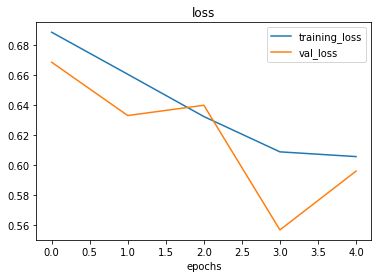

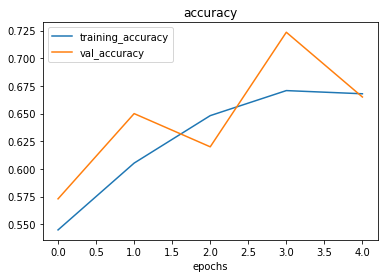

In [20]:
plot_loss_curves(history_3)

## Evaluate the model 3

In [21]:
model_3.evaluate(test_data)

63/63 [==============================] - 7s 113ms/step - loss: 0.5959 - accuracy: 0.6650


[0.5959264039993286, 0.6650000214576721]

# Model 4 - adding more epochs
model 3 seems overfitting therefore adding more epochs to the model.

## creating model 4

In [22]:
# create the model 4
model_4 = tf.keras.models.Sequential()

model_4.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_4.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_4.add(tf.keras.layers.Flatten())

model_4.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# compile model 4
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [24]:
# fit the model 4
history_4 = model_4.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 48s 190ms/step - loss: 0.6900 - accuracy: 0.5436 - val_loss: 0.6567 - val_accuracy: 0.6130
Epoch 2/25
251/251 [==============================] - 43s 173ms/step - loss: 0.6551 - accuracy: 0.6100 - val_loss: 0.6118 - val_accuracy: 0.6755
Epoch 3/25
251/251 [==============================] - 44s 173ms/step - loss: 0.6167 - accuracy: 0.6647 - val_loss: 0.5864 - val_accuracy: 0.6905
Epoch 4/25
251/251 [==============================] - 44s 177ms/step - loss: 0.6009 - accuracy: 0.6775 - val_loss: 0.5669 - val_accuracy: 0.7095
Epoch 5/25
251/251 [==============================] - 43s 173ms/step - loss: 0.5904 - accuracy: 0.6802 - val_loss: 0.5858 - val_accuracy: 0.7010
Epoch 6/25
251/251 [==============================] - 44s 173ms/step - loss: 0.5959 - accuracy: 0.6758 - val_loss: 0.5510 - val_accuracy: 0.7225
Epoch 7/25
251/251 [==============================] - 45s 180ms/step - loss: 0.5764 - accuracy: 0.6978 - val_loss: 0.5376 - val_ac

## Plot loss curves

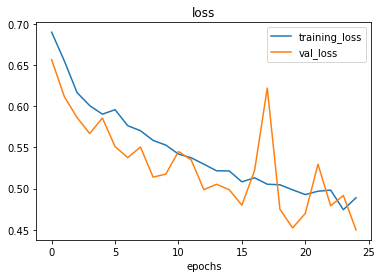

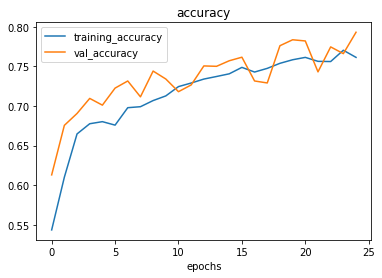

In [25]:
plot_loss_curves(history_4)

##Evaluate model 4

In [26]:
model_4.evaluate(test_data)

63/63 [==============================] - 7s 112ms/step - loss: 0.4498 - accuracy: 0.7930


[0.44975224137306213, 0.7929999828338623]

# Model 5 - Improvment for the model 4
adding more filters to the second Conv2D layer.

## creating model 5

In [27]:
# create the model 5
model_5 = tf.keras.models.Sequential()

model_5.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_5.add(tf.keras.layers.Flatten())

model_5.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [28]:
# compile model 5
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [29]:
# fit the model 5
history_5 = model_5.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 44s 174ms/step - loss: 0.6828 - accuracy: 0.5559 - val_loss: 0.6348 - val_accuracy: 0.6660
Epoch 2/25
251/251 [==============================] - 44s 174ms/step - loss: 0.6478 - accuracy: 0.6204 - val_loss: 0.6657 - val_accuracy: 0.6100
Epoch 3/25
251/251 [==============================] - 45s 179ms/step - loss: 0.6150 - accuracy: 0.6555 - val_loss: 0.5911 - val_accuracy: 0.6960
Epoch 4/25
251/251 [==============================] - 44s 174ms/step - loss: 0.5973 - accuracy: 0.6793 - val_loss: 0.5583 - val_accuracy: 0.7175
Epoch 5/25
251/251 [==============================] - 44s 174ms/step - loss: 0.5843 - accuracy: 0.6880 - val_loss: 0.5557 - val_accuracy: 0.7170
Epoch 6/25
251/251 [==============================] - 44s 174ms/step - loss: 0.5712 - accuracy: 0.6997 - val_loss: 0.6280 - val_accuracy: 0.6795
Epoch 7/25
251/251 [==============================] - 45s 178ms/step - loss: 0.5569 - accuracy: 0.7047 - val_loss: 0.5182 - val_ac

## Plot loss curves

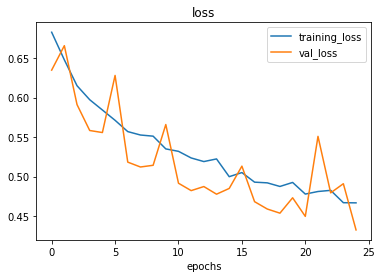

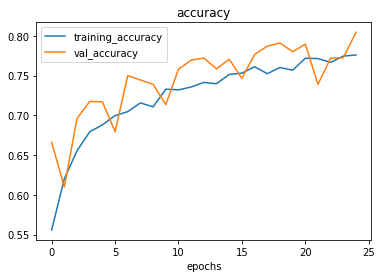

In [30]:
plot_loss_curves(history_5)

## Evaluate model 5

In [31]:
model_5.evaluate(test_data)

63/63 [==============================] - 7s 112ms/step - loss: 0.4324 - accuracy: 0.8045


[0.43236827850341797, 0.8044999837875366]

# Model 6 - Imporvment for model 5
Adding more convolutional and maxpool layer

## Creating the model 6

In [32]:
# create the model 6
model_6 = tf.keras.models.Sequential()

model_6.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Flatten())

model_6.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [33]:
# compile model 6
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [34]:
# fit the model 6
history_6 = model_6.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 44s 174ms/step - loss: 0.6827 - accuracy: 0.5586 - val_loss: 0.6577 - val_accuracy: 0.6365
Epoch 2/25
251/251 [==============================] - 45s 178ms/step - loss: 0.6442 - accuracy: 0.6294 - val_loss: 0.6596 - val_accuracy: 0.6120
Epoch 3/25
251/251 [==============================] - 43s 173ms/step - loss: 0.6187 - accuracy: 0.6625 - val_loss: 0.5662 - val_accuracy: 0.7140
Epoch 4/25
251/251 [==============================] - 44s 174ms/step - loss: 0.5931 - accuracy: 0.6815 - val_loss: 0.5832 - val_accuracy: 0.7050
Epoch 5/25
251/251 [==============================] - 45s 178ms/step - loss: 0.5810 - accuracy: 0.6968 - val_loss: 0.5371 - val_accuracy: 0.7340
Epoch 6/25
251/251 [==============================] - 44s 174ms/step - loss: 0.5635 - accuracy: 0.7054 - val_loss: 0.5529 - val_accuracy: 0.7345
Epoch 7/25
251/251 [==============================] - 44s 174ms/step - loss: 0.5440 - accuracy: 0.7243 - val_loss: 0.4957 - val_ac

## Plot loss curves

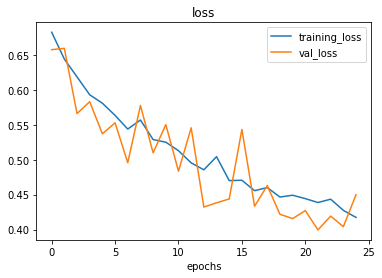

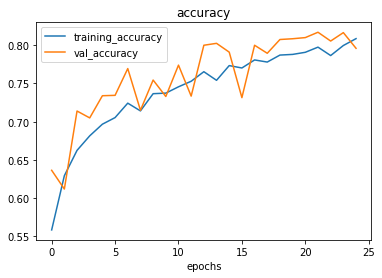

In [35]:
plot_loss_curves(history_6)

## Evaluate the model 6

In [36]:
model_6.evaluate(test_data)

63/63 [==============================] - 7s 111ms/step - loss: 0.4499 - accuracy: 0.7960


[0.44987863302230835, 0.7960000038146973]

# Model 7 - Improvment for the model 6

Adding more conv2d and maxpool layer to the same model structure as model 6

## Creating the model 7

In [37]:
# create the model 7
model_7 = tf.keras.models.Sequential()

model_7.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_7.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_7.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_7.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_7.add(tf.keras.layers.Flatten())

model_7.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [38]:
# compile model 7
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [39]:
# fit the model 7
history_7 = model_7.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 45s 175ms/step - loss: 0.6905 - accuracy: 0.5272 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 2/25
251/251 [==============================] - 43s 172ms/step - loss: 0.6838 - accuracy: 0.5517 - val_loss: 0.6874 - val_accuracy: 0.5300
Epoch 3/25
251/251 [==============================] - 44s 174ms/step - loss: 0.6782 - accuracy: 0.5813 - val_loss: 0.6921 - val_accuracy: 0.5170
Epoch 4/25
251/251 [==============================] - 44s 176ms/step - loss: 0.6634 - accuracy: 0.6025 - val_loss: 0.6847 - val_accuracy: 0.5815
Epoch 5/25
251/251 [==============================] - 44s 174ms/step - loss: 0.6486 - accuracy: 0.6198 - val_loss: 0.7290 - val_accuracy: 0.5600
Epoch 6/25
251/251 [==============================] - 43s 172ms/step - loss: 0.6247 - accuracy: 0.6482 - val_loss: 0.6200 - val_accuracy: 0.6500
Epoch 7/25
251/251 [==============================] - 44s 174ms/step - loss: 0.6030 - accuracy: 0.6723 - val_loss: 0.5461 - val_ac

## Plot loss curves

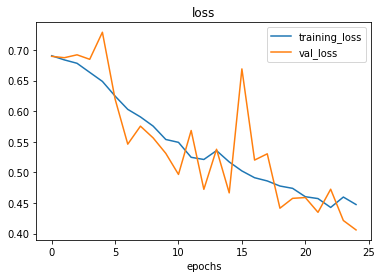

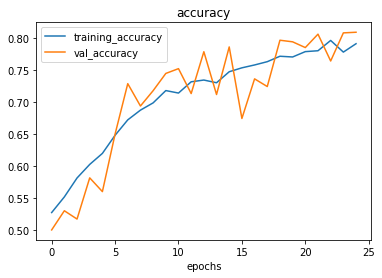

In [40]:
plot_loss_curves(history_7)

## Evaluate the model 7

In [41]:
model_7.evaluate(test_data)

63/63 [==============================] - 8s 127ms/step - loss: 0.4060 - accuracy: 0.8095


[0.4059891700744629, 0.809499979019165]